In [ ]:
from random import seed
from random import randrange
from random import random
from csv import reader
from math import exp, tanh
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
import warnings 
warnings.filterwarnings('ignore')

In [ ]:
class NeuralNetwork:

  def __init__(self,learning_rate=0.01):
    self.learning_rate = learning_rate
    seed(10)

  def initialize_network(self,n_inputs, n_hidden, n_outputs,n_layer):
    network = []
    for i in range(n_layer):
      hidden_layer = [{'weights': [random() for i in range(n_inputs + 1)]} for i in range(n_hidden)]
      network.append(hidden_layer)
    output_layer = [{'weights': [random() for i in range(n_hidden+ 1)]} for i in range(n_outputs)]
    network.append(output_layer)
    return network


  def activate(self,weight,input):
    total = weight[-1]
    #print(weight,input)
    for i in range(len(input)):
      total += weight[i]*input[i]
    return total

  def sigmoid_activation(self,X):
    return 1.0/(1 + np.exp(-X))

  def sigmoid_derivative(self,X):
    return X * (1.0 - X)

  def forward_propagate(self,network, data_row ):

    inputs= data_row

    for layer in network:
        new_inputs = []
        for neuron in layer:
            activation = self.activate(neuron['weights'], inputs)
            # Add the neuron output into the neuron item (before 'weight')
            neuron['output'] = self.sigmoid_activation(activation)

            new_inputs.append(neuron['output'])

        inputs = new_inputs.copy()
        # returns the outputs from the last layer
    return inputs


  def backward_propagate_error(self,network, expected):

          # Start from last layer

      for layer_index in reversed(range(len(network))):

          layer = network[layer_index]
          errors = []

                  # --- (2) Error computed for the hidden layers: error = (weight_k * error_j) * transfer_derivative(output)

          if layer_index != len(network) - 1:

              for neuron_index in range(len(layer)):
                  error = 0.0
                  # --- (A) error = Sum(delta * weight linked to this delta)
                  #                for each neuron[LAYER N+1] linked to this neuron[LAYER N] (current layer)
                  for neuron_layer_M in network[layer_index + 1]:
                      error += neuron_layer_M['weights'][neuron_index]  * neuron_layer_M['delta']
                  errors.append(error)
          else:
                  # --- (1) Error computed for the last layer: error = (expected - output) * transfer_derivative(output)
                          # --- (A) Store the difference between expected and output for each output neuron in errors[]
              for neuron_index in range(len(layer)):
                  neuron = layer[neuron_index]
                  errors.append(expected[neuron_index] - neuron['output'])
                  # --- (B) Store the error signal in delta for each neuron
          for neuron_index in range(len(layer)):
              neuron = layer[neuron_index]
              neuron['delta'] = errors[neuron_index]* self.sigmoid_derivative(neuron['output'])


  def update_weights(self,network, row):

    for layer_index in range(len(network)):
        inputs = row
        if layer_index != 0:

                        # --- (1) Store the outputs of the layer N-1 into inputs[]
            inputs = [neuron['output'] for neuron in network[layer_index- 1]]

        for neuron in network[layer_index]:

                        # --- (2) Compute the new weights for each neuron of the layer N
            for input_index in range(len(inputs)):
                neuron['weights'][input_index] += self.learning_rate * neuron['delta'] * inputs[input_index]
                        # --- (3) Update the bias of the neuron (input=1 below)

            neuron['weights'][-1] += self.learning_rate * neuron['delta'] * 1


# Training the network.

  def train_network(self,network,train_data,train_out,test_data,test_out,n_epoch,n_outputs):
      costs=[]
      for epoch in range(n_epoch):
          sum_error = 0
          for row in range(len(train_data)):
              outputs = self.forward_propagate(network, train_data[row])
              expected = [train_out[row]]
              sum_error += sum([(expected[i] - outputs[i]) ** 2 for i in
                              range(len(expected))])
              self.backward_propagate_error(network, expected)
              self.update_weights(network, train_data[row])

          curr_cost= sum_error/(2*len(train_data))
          costs.append(curr_cost)

          print("\nAfter epoch {} the error and accuracy are ".format(epoch+1))
          
          curr_acc_test=self.get_prediction_accuracy(network, test_data,test_out)
          curr_acc_train=self.get_prediction_accuracy(network, train_data,train_out)

          print("Training Accuracy = ",curr_acc_train)
          print("Test Accuracy = ",curr_acc_test)
          print("Error = ",curr_cost)
          print('\n')

      print("For Self Developed Code")
      print("Final Training Accuracy = ",curr_acc_train)
      print("Final Test Accuracy = ",curr_acc_test)

      return costs

# Prediction with a network

  def predict(self,network, row):
      outputs = self.forward_propagate(network, row)
      
      if outputs[0]>=0.5:
        return 1
      else:
        return 0

  def get_prediction_accuracy(self,network, test_data,test_out):
      predictions = []
      for row in test_data:
          prediction = self.predict(network, row)
          predictions.append(prediction)
      expected_out = test_out
      accuracy = accuracy_score(expected_out, predictions)
      return accuracy

# Backpropagation Algorithm

  def back_propagation(self,train_data,train_out,test_data,test_out,n_epoch,n_hidden,n_layer):
      n_inputs = len(train_data[0])
      n_outputs = 1

      network = self.initialize_network(n_inputs, n_hidden, n_outputs,n_layer)

      layer = []
      for i in range(len(network)):
          layer.append(len(network[i]))
      print('Network created with {} layers of sizes {} respectively\n'.format(len(network), layer))

      for i in range(len(network)):
        for j in range(len(network[i])):
          print("Weights initialized for layer {} node {} are {}".format(i,j,np.around(network[i][j]['weights'],2)))

      costs= self.train_network(network,train_data,train_out,test_data,test_out,n_epoch,n_outputs)
      predictions = []

      for row in test_data:
          prediction = self.predict(network, row)
          predictions.append(prediction)
      return predictions,costs

In [ ]:
data = pd.read_csv('heart.csv')
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
X = data.iloc[:, 0:-1].values
Y = data.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2,random_state=40)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# MANUL PREDICTION
trainer=NeuralNetwork()
n_epoch=100
n_hidden=20
n_layer = 1
pred,costs=trainer.back_propagation(X_train,y_train,X_test,y_test,n_epoch,n_hidden,n_layer)

from sklearn import metrics

cm = metrics.confusion_matrix(pred,y_test)
print("\nClassification report: \n%s\n" % (metrics.classification_report(pred,y_test)))    
print("Confusion matrix:\n%s" % cm)

Network created with 2 layers of sizes [20, 1] respectively

Weights initialized for layer 0 node 0 are [0.57 0.43 0.58 0.21 0.81 0.82 0.65 0.16 0.52 0.33 0.25 0.95 1.   0.04]
Weights initialized for layer 0 node 1 are [0.86 0.6  0.38 0.28 0.67 0.46 0.69 0.66 0.13 0.77 0.98 0.97 0.61 0.04]
Weights initialized for layer 0 node 2 are [0.   0.13 0.94 0.3  0.37 0.9  0.31 0.55 0.44 0.06 0.58 0.84 0.16 0.22]
Weights initialized for layer 0 node 3 are [0.41 0.04 0.5  0.82 0.66 0.53 0.86 0.15 0.57 0.37 0.6  0.11 0.78 0.1 ]
Weights initialized for layer 0 node 4 are [0.17 0.81 0.95 0.43 0.41 0.25 0.27 0.62 0.18 0.12 0.46 0.16 0.65 0.82]
Weights initialized for layer 0 node 5 are [0.78 0.48 0.35 0.43 0.01 0.71 0.33 0.32 0.08 0.45 0.58 0.39 0.87 0.67]
Weights initialized for layer 0 node 6 are [0.24 0.53 0.91 0.52 0.6  0.06 0.49 0.46 0.4  0.42 0.58 0.54 0.49 0.17]
Weights initialized for layer 0 node 7 are [0.44 0.97 0.42 0.04 0.   0.54 0.05 0.09 0.11 0.45 0.99 0.49 0.46 0.44]
Weights initialized

In [ ]:
# LIBRARY PREDICTION
clf = MLPClassifier(activation='logistic').fit(X_train, y_train)
y_pred=clf.predict(X_test)
y_pred_train=clf.predict(X_train)

print("\nFor Library")
print("Train Accuracy=",accuracy_score(y_train,y_pred_train))
print("Test Accuracy=",accuracy_score(y_test,y_pred))


For Library
Train Accuracy= 0.8634146341463415
Test Accuracy= 0.8195121951219512


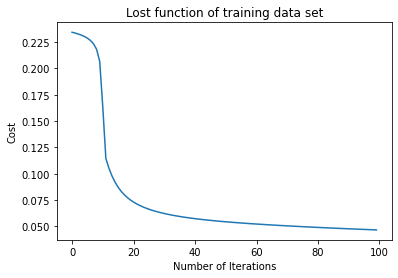

In [ ]:
th=  np.array([i for i in range(n_epoch)])
cost= np.array(costs)
plt.title('Lost function of training data set')
plt.xlabel('Number of Iterations')
plt.ylabel('Cost')
plt.plot(th, cost)
print("\n")
plt.show()